In [1]:
!mkdir -p ~/.kaggle
!cp kaggle. json ~/ kaggle/

cp: target 'kaggle/' is not a directory


In [2]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
brain-tumor-mri-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras. layers import Dense, Conv2D,MaxPooling2D, Flatten, BatchNormalization , Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers

In [4]:
import zipfile
zf = zipfile.ZipFile('/content/brain-tumor-mri-dataset.zip')
zf.extractall('/content')
zf.close()

In [5]:
train = keras.utils.image_dataset_from_directory(
    directory = '/content/Training',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)

)
test = keras.utils.image_dataset_from_directory(
    directory = '/content/Testing',
    labels = 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 5712 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.


In [6]:
def process(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image , label
train_data = train.map(process)
test_data = test.map(process)

In [7]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='valid',input_shape=(256,256,3)))
model.add(MaxPooling2D(strides=2, pool_size=(2,2),padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='valid'))
model.add(MaxPooling2D(strides=2, pool_size=(2,2),padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='valid'))
model.add(MaxPooling2D(strides=2, pool_size=(2,2),padding='valid'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,492 (56.64 MB)

 Trainable params: 14,847,492 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
early_stopping = EarlyStopping(monitor = 'val_loss',patience = 4 , restore_best_weights=True)
history = model.fit(train_data,epochs = 6 , validation_data = test_data, callbacks = [early_stopping])

Epoch 1/6
179/179 ━━━━━━━━━━━━━━━━━━━━ 36s 145ms/step - accuracy: 0.6069 - loss: 0.9341 - val_accuracy: 0.8398 - val_loss: 0.4199
Epoch 2/6
179/179 ━━━━━━━━━━━━━━━━━━━━ 20s 74ms/step - accuracy: 0.8763 - loss: 0.3245 - val_accuracy: 0.8993 - val_loss: 0.2751
Epoch 3/6
179/179 ━━━━━━━━━━━━━━━━━━━━ 14s 75ms/step - accuracy: 0.9483 - loss: 0.1450 - val_accuracy: 0.9199 - val_loss: 0.2564
Epoch 4/6
179/179 ━━━━━━━━━━━━━━━━━━━━ 13s 74ms/step - accuracy: 0.9722 - loss: 0.0832 - val_accuracy: 0.9466 - val_loss: 0.1839
Epoch 5/6
179/179 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step - accuracy: 0.9919 - loss: 0.0302 - val_accuracy: 0.9466 - val_loss: 0.1998
Epoch 6/6
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step - accuracy: 0.9845 - loss: 0.0486 - val_accuracy: 0.9413 - val_loss: 0.1991


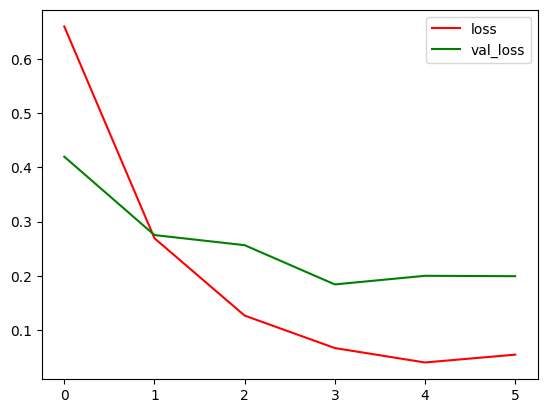

In [11]:
plt.plot(history.history['loss'],label='loss',color = 'red')
plt.plot(history.history['val_loss'],label='val_loss',color = 'green')
plt.legend()
plt.show()

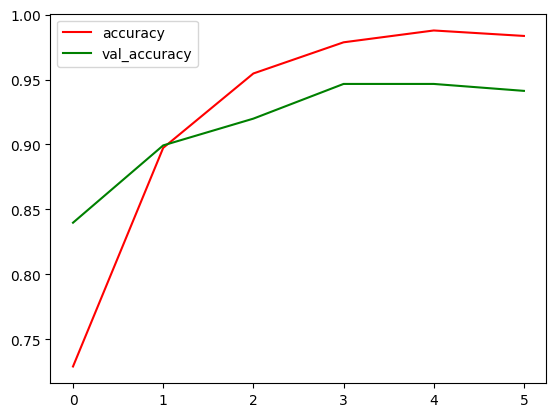

In [12]:
plt.plot(history.history['accuracy'],label='accuracy',color = 'red')
plt.plot(history.history['val_accuracy'],label='val_accuracy',color = 'green')
plt.legend()
plt.show()

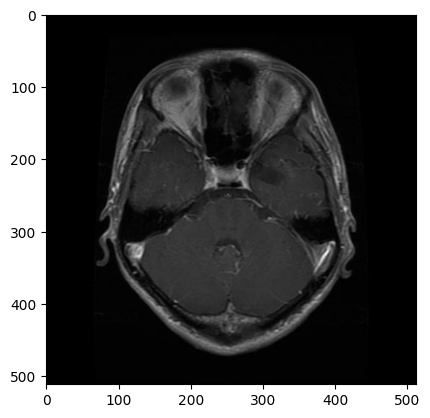

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 939ms/step
Predicted Class: glioma


In [13]:
import cv2
class_labels = {0: 'glioma', 1: 'meningioma', 2: 'notumor', 3: 'pituitary'}

img1 = cv2.imread('/content/Testing/glioma/Te-glTr_0001.jpg')
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()


img1 = cv2.resize(img1, (256, 256))
img1 = img1.reshape((1, 256, 256, 3))
img1 = img1 / 255.0


prediction = model.predict(img1)


predicted_class_index = np.argmax(prediction, axis=1)[0]
predicted_class_label = class_labels[predicted_class_index]
print("Predicted Class:", predicted_class_label)


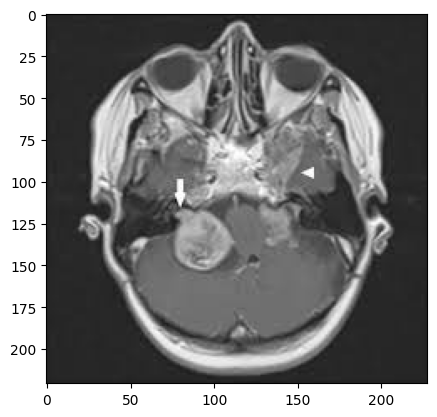

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Class: notumor


In [14]:

img1 = cv2.imread('/content/Testing/meningioma/Te-meTr_0002.jpg')
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()


img1 = cv2.resize(img1, (256, 256))
img1 = img1.reshape((1, 256, 256, 3))
img1 = img1 / 255.0





prediction = model.predict(img1)
predicted_class_index = np.argmax(prediction, axis=1)[0]
predicted_class_label = class_labels[predicted_class_index]
print("Predicted Class:", predicted_class_label)


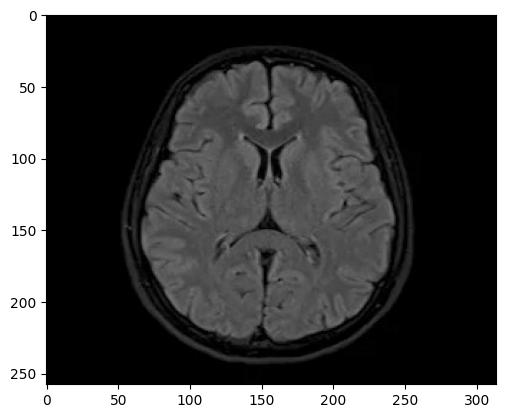

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Class: notumor


In [15]:
img1 = cv2.imread('/content/Testing/notumor/Te-noTr_0002.jpg')
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()

img1 = cv2.resize(img1, (256, 256))
img1 = img1.reshape((1, 256, 256, 3))
img1 = img1 / 255.0


prediction = model.predict(img1)
predicted_class_index = np.argmax(prediction, axis=1)[0]
predicted_class_label = class_labels[predicted_class_index]
print("Predicted Class:", predicted_class_label)


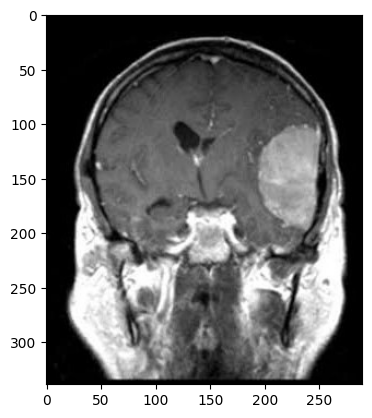

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Class: meningioma


In [16]:
img1 = cv2.imread('/content/Testing/meningioma/Te-me_0016.jpg')
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()


img1 = cv2.resize(img1, (256, 256))
img1 = img1.reshape((1, 256, 256, 3))
img1 = img1 / 255.0



prediction = model.predict(img1)
predicted_class_index = np.argmax(prediction, axis=1)[0]
predicted_class_label = class_labels[predicted_class_index]
print("Predicted Class:", predicted_class_label)


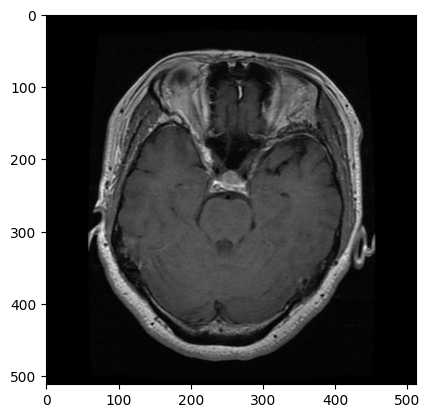

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted Class: pituitary


In [17]:
img1 = cv2.imread('/content/Testing/pituitary/Te-pi_0023.jpg')
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()

img1 = cv2.resize(img1, (256, 256))
img1 = img1.reshape((1, 256, 256, 3))
img1 = img1 / 255.0

prediction = model.predict(img1)
predicted_class_index = np.argmax(prediction, axis=1)[0]
predicted_class_label = class_labels[predicted_class_index]
print("Predicted Class:", predicted_class_label)


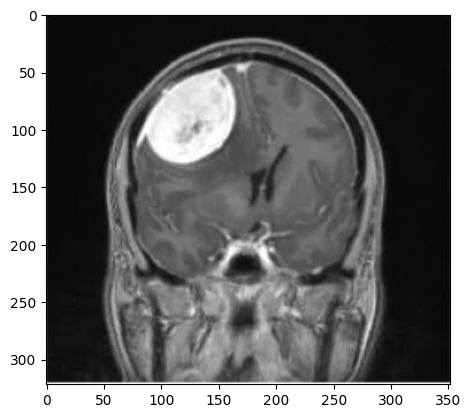

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Class: meningioma


In [19]:
img1 = cv2.imread('/content/Testing/meningioma/Te-me_0061.jpg')
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()

img1 = cv2.resize(img1, (256, 256))
img1 = img1.reshape((1, 256, 256, 3))
img1 = img1 / 255.0

prediction = model.predict(img1)
predicted_class_index = np.argmax(prediction, axis=1)[0]
predicted_class_label = class_labels[predicted_class_index]
print("Predicted Class:", predicted_class_label)


In [20]:
from google.colab import files
from tensorflow.keras.models import load_model
model.save('my_model.h5')
